# EDA

Empezamos cargando las librerias necesarias

In [7]:
# Importar librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import r2_score, accuracy_score, confusion_matrix, classification_report
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [8]:
datos = pd.read_csv('ILPD.csv')
df = pd.DataFrame(datos)
df

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [9]:
# Explorar el dataframe
print(df.shape)
print(df.columns)
print(df.dtypes)
print(df.iloc[:, :-1].describe())

(583, 11)
Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')
Age                             int64
Gender                         object
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alamine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
Dataset                         int64
dtype: object
              Age  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
count  583.000000       583.000000        583.000000            583.000000   
mean    44.746141         3.298799          1.486106            290.576329   
std     16.189833         6.209522          2.808498            2

In [10]:
# Calcular el número de valores faltantes por columna
missing_values_count = df.isnull().sum()

# Calcular el porcentaje de valores faltantes por columna
missing_values_percent = 100 * missing_values_count / len(df)

# Crear un dataframe con el número y el porcentaje de valores faltantes
missing_values_df = pd.DataFrame({'count': missing_values_count, 'percent': missing_values_percent})

# Mostrar el dataframe ordenado por porcentaje de forma descendente
missing_values_df.sort_values('percent', ascending=False)

,count,percent
Albumin_and_Globulin_Ratio,4,0.686106
Age,0,0.000000
Gender,0,0.000000
Total_Bilirubin,0,0.000000
Direct_Bilirubin,0,0.000000
Alkaline_Phosphotase,0,0.000000
Alamine_Aminotransferase,0,0.000000
Aspartate_Aminotransferase,0,0.000000
Total_Protiens,0,0.000000
Albumin,0,0.000000


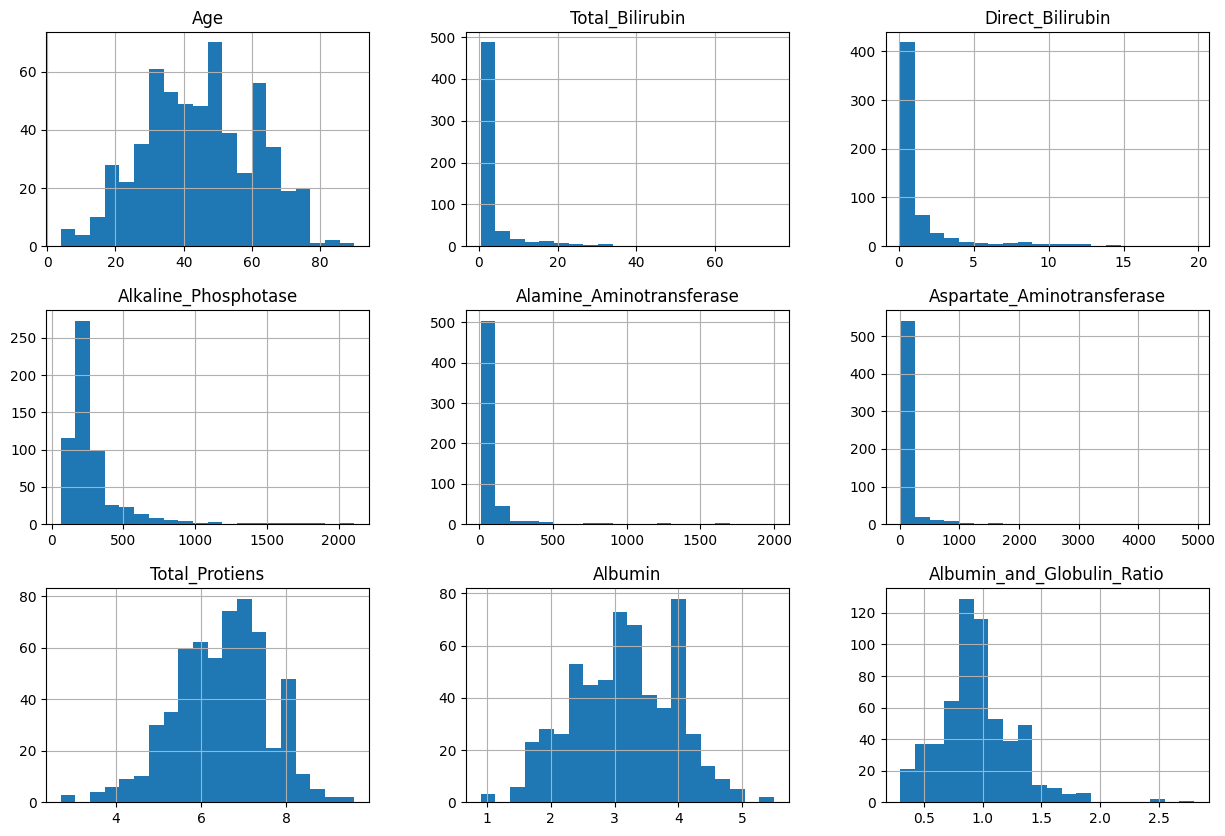

In [11]:
# Generar histogramas para las variables numéricas
df.iloc[:, :-1].hist(bins=20, figsize=(15, 10))
plt.show()

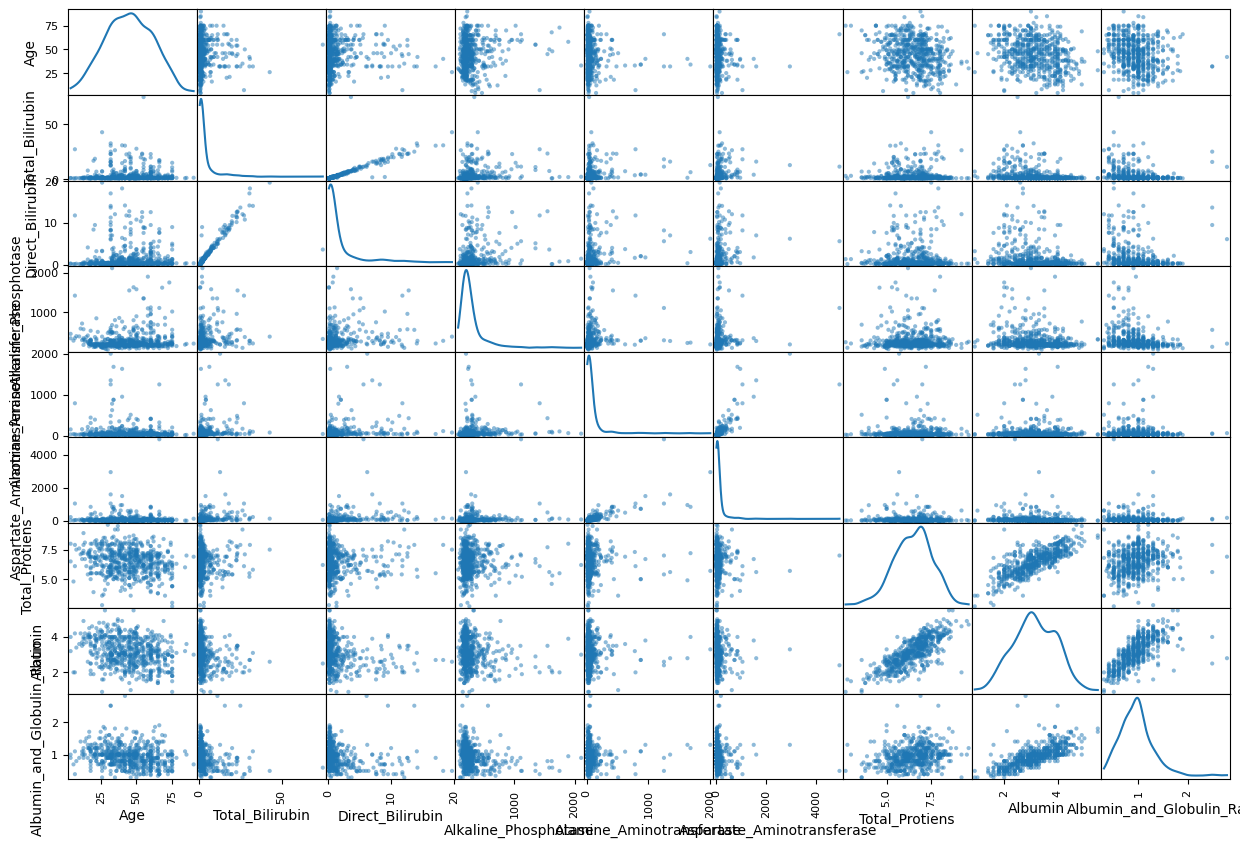

In [12]:
# Generar una matriz de diagramas de dispersión para las variables numéricas
pd.plotting.scatter_matrix(df.iloc[:, :-1], figsize=(15,10), diagonal='kde')
plt.show()

In [13]:
# Calcular la matriz de correlación entre las variables numéricas
corr_matrix = df.iloc[:, :-1].corr()

# Visualizar la matriz de correlación
pd.plotting.scatter_matrix(corr_matrix, figsize=(15,10), diagonal='kde')
plt.show()

ValueError: could not convert string to float: 'Female'

Convertimos el data frame en un data frame para predictores y una serie para la variable salida

In [14]:
# Dividir el dataframe en X e y
X = df.drop("Dataset", axis=1)
y = df["Dataset"]
print(X.info())
print("\n")
print(y.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
dtypes: float64(5), int64(4), object(1)
memory usage: 45.7+ KB
None


<class 'pandas.core.series.Series'>
RangeIndex: 583 entries, 0 to 582
Series name: Dataset
Non-Null Count  Dtype
--------------  -----
583 no

In [15]:
# Dividir aleatoriamente el conjunto de datos en entrenamiento y prueba con Holdout 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# KNN

In [ ]:
from sklearn.preprocessing import OneHotEncoder

def apply_one_hot_encoding(df, factor_columns):
    # Crea el codificador OneHotEncoder
    encoder = OneHotEncoder(sparse=False)

    # Selecciona las columnas de factor o strings
    factor_data = df[factor_columns]

    # Aplica la codificación OneHotEncoder a las columnas de factor
    encoded_data = encoder.fit_transform(factor_data)

    # Crea un nuevo dataframe con las columnas codificadas
    encoded_columns = encoder.get_feature_names_out(factor_columns)
    encoded_df = pd.DataFrame(encoded_data, columns=encoded_columns, index=df.index)

    print(encoded_df.head())

    # Une el nuevo data frame con las columnas codificadas al dataframe original
    final_df = pd.concat([df.drop(factor_columns, axis=1), encoded_df], axis=1)

    return final_df

In [ ]:
# Definir qué variables del dataframe son factores
factor_columns = ['Gender']

#Ejectutar función
xtrain_final = apply_one_hot_encoding(X_train, factor_columns)
xtest_final = apply_one_hot_encoding(X_test, factor_columns)

In [ ]:
# Crear un objeto SimpleImputer con la estrategia "mean" (media)
imputer = SimpleImputer(strategy='mean')

# Ajustar y transformar los datos con el imputador en tu conjunto de entrenamiento
xtrain_final = imputer.fit_transform(xtrain_final)

# Transformar los datos de prueba con el mismo imputador
xtest_final = imputer.transform(xtest_final)

In [ ]:
# Normalizar los datos
scaler = StandardScaler()
xtrain_final = scaler.fit_transform(xtrain_final)
xtest_final = scaler.transform(xtest_final)

In [ ]:
# Búsqueda de hiperparámetros en grid

# Define los hiperparámetros para la búsqueda en grid
param_grid = {
    'n_neighbors': list(range(1, 31, 2)),
    'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski'],
    'weights': ['uniform', 'distance']
}

# Crea un modelo KNN
knn = KNeighborsClassifier()

# Realiza la búsqueda de hiperparámetros con k-fold validation (k=10)
grid_search = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', verbose=1)
grid_search.fit(xtrain_final, y_train)

# Imprime los mejores hiperparámetros encontrados
print(f'Mejores hiperparámetros: {grid_search.best_params_}')
print("Precisión promedio:", grid_search.best_score_)

In [ ]:
best_accuracy = 0
best_hyperparameters = {}

for n_neighbors in range(3, 31, 2):
    for metric in ['euclidean', 'manhattan', 'chebyshev', 'minkowski']:
        for weights in ['uniform', 'distance']:
            knn = KNeighborsClassifier(n_neighbors=n_neighbors, metric=metric, weights=weights)
            scores = cross_val_score(knn, xtrain_final, y_train, cv=10, scoring='accuracy')
            average_accuracy = scores.mean()

            if average_accuracy > best_accuracy:
                best_accuracy = average_accuracy
                best_hyperparameters = {
                    'n_neighbors': n_neighbors,
                    'metric': metric,
                    'weights': weights
                }

# Imprime los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", best_hyperparameters)
print("Precisión promedio:", best_accuracy)

In [ ]:
# Crear un modelo KNN con los mejores hiperparámetros encontrados
best_knn = KNeighborsClassifier(n_neighbors=29, metric='chebyshev', weights='distance')

# Ajustar el modelo con los datos de entrenamiento
best_knn.fit(xtrain_final, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = best_knn.predict(xtest_final)

# Calcular la sensibilidad (recall)
sensibilidad = recall_score(y_test, y_pred)
print("Sensibilidad en el conjunto de prueba:", sensibilidad)

# Evaluar el modelo en el conjunto de prueba
test_accuracy = best_knn.score(xtest_final, y_test)
print("Precisión en el conjunto de prueba:", test_accuracy)

In [ ]:
# Construcción del modelo final

# 1. Preprocesado

# 1.1 Variables categóricas :

def apply_one_hot_encoding(df, factor_columns):
    # Crea el codificador OneHotEncoder
    encoder = OneHotEncoder(sparse=False)

    # Selecciona las columnas de factor o strings
    factor_data = df[factor_columns]

    # Aplica la codificación OneHotEncoder a las columnas de factor
    encoded_data = encoder.fit_transform(factor_data)

    # Crea un nuevo dataframe con las columnas codificadas
    encoded_columns = encoder.get_feature_names_out(factor_columns)
    encoded_df = pd.DataFrame(encoded_data, columns=encoded_columns, index=df.index)

    print(encoded_df.head())

    # Une el nuevo data frame con las columnas codificadas al dataframe original
    final_df = pd.concat([df.drop(factor_columns, axis=1), encoded_df], axis=1)

    return final_df

# Ejectutar función
x_knn = apply_one_hot_encoding(X, factor_columns)


# 1.2 Imputación de valores faltantes

# Ajustar y transformar los datos con el imputador
x_knn = imputer.fit_transform(x_knn)


# 1.3 Normalizar los datos
x_knn = scaler.fit_transform(x_knn)



# 2. Ajustar el modelo final con todos los datos
best_knn.fit(x_knn, y)

# Árboles de clasificación

## Preproceso con pipeline

Vamos a empezar creando la pipeline que le vamos a aplicar a nuestros datos pero que va a ser efectiva para cualquier conjunto de datos al que queramos aplicar un modelo de árbol de clasificación

In [33]:
# Crear un pipeline que preprocese los datos numéricos 
pipeline_cuantitativas = Pipeline([
    ("imputer",SimpleImputer(strategy="mean")), #Imputamos los datos faltantes con la media
    ("scaler", StandardScaler()) 
])

pipeline_categoricas = Pipeline([
    ("encoder", OneHotEncoder()), # Codificar los datos categóricos
])

Preprocesador = ColumnTransformer([
    ("num", pipeline_cuantitativas, ["Age", "Total_Bilirubin", "Direct_Bilirubin", "Alkaline_Phosphotase", "Alamine_Aminotransferase", "Aspartate_Aminotransferase","Total_Protiens","Albumin","Albumin_and_Globulin_Ratio"]), # Aplicar el pipeline numérico a las columnas numéricas
    ("cat", pipeline_categoricas, ["Gender"]) # Aplicar el pipeline categórico a las columnas categóricas
])

**Vamos ahora a juntar la pipa con otra que nos entrene también el modelo**

In [34]:
# Crear un pipeline que preprocese los datos y ajuste un modelo de árbol de decisión
Clasificador_tree = DecisionTreeClassifier(random_state=10453131) # Crear un modelo de árbol de decisión

tree_pipeline = Pipeline([
    ("preprocessor", Preprocesador), # Preprocesar los datos con el transformador de columnas
    ("Clasificador_tree", Clasificador_tree) # Ajustar un modelo de árbol de decisión
])

**Vamos a crear un grid para el ajuste de hiperparámetros con k-fold validation = 10**

In [104]:
param_grid_tree = {
    "Clasificador_tree__max_depth":list(range(4, 11, 1)), #Profundidad máxima del árbol la miramos de 4 a 10
    "Clasificador_tree__min_samples_split": [5, 10, 15, 20, 25], #Número mínimo de muestras requeridas para dividir un nodo interno
    "Clasificador_tree__min_samples_leaf": [5, 10, 15, 20, 25], #Número mínimo de muestras requeridas para ser una hoja
    "Clasificador_tree__criterion": ["gini", "entropy"], #Criterio usado para dividir
}
grid_search = GridSearchCV(tree_pipeline, param_grid_tree, cv=10, scoring='accuracy',verbose=1) #Creamos y ajustamos el grid con k-fold

# Dividir aleatoriamente el conjunto de datos en entrenamiento y prueba con Holdout 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100453131)

#Ajustamos los hiperparámetros con los datos de entrenamiento
grid_search.fit(X_train,y_train)

# Mostrar los mejores hiperparámetros encontrados
print("Los mejores hiperparámetros son:", grid_search.best_params_)
print("La precisión del modelo es", round(grid_search.best_score_,4))

Fitting 10 folds for each of 350 candidates, totalling 3500 fits
Los mejores hiperparámetros son: {'Clasificador_tree__criterion': 'gini', 'Clasificador_tree__max_depth': 4, 'Clasificador_tree__min_samples_leaf': 5, 'Clasificador_tree__min_samples_split': 20}
La precisión del modelo es 0.7233


Además si queremos ver de forma interactiva lo que nos está haciendo nuestra pipeline

In [100]:
grid_search.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Total_Bilirubin',
                                                   'Direct_Bilirubin',
                                                   'Alkaline_Phosphotase',
                                                   'Alamine_Aminotransferase',
                                                   'Aspartate_Aminotransferase',
                                                   'Total_Protiens', 'Albumin',
                                                   'Albumin_and_Globulin_Ratio']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder())]),
                                                  ['Gender'])])),
                ('Clasificador_tree',
                 DecisionTreeClassifier(max_depth=4, min_samples_leaf=5,
                                        min_samples_split=20,
                                        random_state=10453131))])

In [105]:
accuracy = grid_search.best_estimator_.score(X_test, y_test) #Calculamos la accuracy
print(f"Precisión del modelo en datos de test: {accuracy:.4f}") #La mostramos

# Hacer predicciones en el conjunto de test
y_pred = grid_search.best_estimator_.predict(X_test)

# Calcular la sensibilidad (recall)
sensibilidad = recall_score(y_test, y_pred)
print("Sensibilidad en el conjunto de test:", round(sensibilidad,4))

Precisión del modelo en datos de test: 0.6752
Sensibilidad en el conjunto de prueba: 0.939


**Vemos también la matriz de confusión**

In [93]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[79  3]
 [33  2]]


**Entrenamiento del modelo final para producción**

Ajustamos el modelo con todos nuestros datos y los hiperparámetros anteriores.

In [96]:
Arbol_Hiperparametros = DecisionTreeClassifier(max_depth=4,min_samples_leaf=15,min_samples_split=10,criterion='gini')

tree_pipeline_final = Pipeline([
    ("preprocessor", Preprocesador), # Preprocesar los datos con el transformador de columnas
    ("Clasificador_tree", Arbol_Hiperparametros) # Ajustar un modelo de árbol de decisión
]) # Creamos otra pipeline que tenga el nuevo modelo, pero que nos limpie los datos de la forma adecuada

modelo_final_tree = tree_pipeline_final.fit(X,y) #Ajustamos el modelo
modelo_final_tree

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Total_Bilirubin',
                                                   'Direct_Bilirubin',
                                                   'Alkaline_Phosphotase',
                                                   'Alamine_Aminotransferase',
                                                   'Aspartate_Aminotransferase',
                                                   'Total_Protiens', 'Albumin',
                                                   'Albumin_and_Globulin_Ratio']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder())]),
                                                  ['Gender'])])),
                ('Clasificador_tree',
                 DecisionTreeClassifier(max_depth=4, min_samples_leaf=15,
                                        min_samples_split=10))])

# Extra: Ajuste con RandomForest

La idea esta detras del Ensemble Learning, en este caso vamos a estimar muchos árboles de decisión.

Como lo que hacemos por detrás es lo mismo que en el caso de los árboles de decisión, el preprocesamiento es el mismo, esto nos va a ayudar a la hora de crear la pipa

In [108]:
# Crear un pipeline que preprocese los datos y ajuste un modelo de bosque de clasificación
Clasificador_forest = RandomForestClassifier(random_state=100453131) # Crear un modelo de bosque aleatorio

forest_pipeline = Pipeline([
    ("preprocessor", Preprocesador), # Preprocesar los datos con el transformador de columnas
    ("Clasificador_forest", Clasificador_forest) # Ajustar un modelo de bosque aleatorio
])

param_grid_forest = {
    "Clasificador_forest__n_estimators": [5,10,20,30,40,50,60,70,80,90,100],  # Número de árboles estimados
}
grid_search = GridSearchCV(forest_pipeline, param_grid_forest , cv=10, scoring='accuracy',verbose=1) #Creamos y ajustamos el grid con k-fold

# Dividir aleatoriamente el conjunto de datos en entrenamiento y prueba con Holdout 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100453131)

#Ajustamos los hiperparámetros con los datos de entrenamiento
grid_search.fit(X_train,y_train)

# Mostrar los mejores hiperparámetros encontrados
print("Los mejores hiperparámetros son:", grid_search.best_params_)
print("La precisión del modelo es", round(grid_search.best_score_,4))

accuracy = grid_search.best_estimator_.score(X_test, y_test) #Calculamos la accuracy
print(f"Precisión del modelo en datos de test: {accuracy:.4f}") #La mostramos

# Hacer predicciones en el conjunto de prueba
y_pred = grid_search.best_estimator_.predict(X_test)

# Calcular la sensibilidad (recall)
sensibilidad = recall_score(y_test, y_pred)
print("Sensibilidad en los datos de test:", round(sensibilidad,4))

cm = confusion_matrix(y_test, y_pred)
print(cm)

Fitting 10 folds for each of 11 candidates, totalling 110 fits
Los mejores hiperparámetros son: {'Clasificador_forest__n_estimators': 50}
La precisión del modelo es 0.7319
Precisión del modelo en datos de test: 0.6752
Sensibilidad en los datos de test: 0.9024
[[74  8]
 [30  5]]


In [98]:
Bosque_Hiperparametros = RandomForestClassifier(n_estimators=50)

Bosque_pipeline_final = Pipeline([
    ("preprocessor", Preprocesador), # Preprocesar los datos con el transformador de columnas
    ("Clasificador_forest", Clasificador_forest) # Ajustar un modelo de bosque aleatorio
]) #Creamos otra pipeline que tenga el nuevo modelo, pero que nos limpie los datos de la forma adecuada

modelo_final_forest = Bosque_pipeline_final.fit(X,y) #Ajustamos el modelo
modelo_final_forest

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Total_Bilirubin',
                                                   'Direct_Bilirubin',
                                                   'Alkaline_Phosphotase',
                                                   'Alamine_Aminotransferase',
                                                   'Aspartate_Aminotransferase',
                                                   'Total_Protiens', 'Albumin',
                                                   'Albumin_and_Globulin_Ratio']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder())]),
                                                  ['Gender'])])),
                ('Clasificador_forest',
                 RandomForestClassifier(random_state=100453131))])